In [ ]:
!git add lda.ipynb
!git commit -m "new"
!git push

[master 17058da] new
 1 file changed, 41 insertions(+), 8 deletions(-)
Git 2.0 from 'matching' to 'simple'. To squelch this message
and maintain the traditional behavior, use:

  git config --global push.default matching

To squelch this message and adopt the new behavior now, use:

  git config --global push.default simple

When push.default is set to 'matching', git will push local branches
to the remote branches that already exist with the same name.

Since Git 2.0, Git defaults to the more conservative 'simple'
behavior, which only pushes the current branch to the corresponding
remote branch that 'git pull' uses to update the current branch.

See 'git help config' and search for 'push.default' for further information.
(the 'simple' mode was introduced in Git 1.7.11. Use the similar mode
'current' instead of 'simple' if you sometimes use older versions of Git)

Counting objects: 3, done.
Delta compression using up to 8 threads.
Compressing objects: 100% (3/3), done.
Writing objects:

In [5]:
!curl -O http://www.cs.princeton.edu/~blei/lda-c/ap.tgz
!tar xzf ap.tgz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2857k  100 2857k    0     0  1395k      0  0:00:02  0:00:02 --:--:-- 1395k


In [7]:
# test

In [9]:
from gensim import corpora, models, matutils

In [13]:
corpus = corpora.BleiCorpus('ap/ap.dat', 'ap/vocab.txt')

In [16]:
model = models.ldamodel.LdaModel(corpus, num_topics=100, id2word=corpus.id2word)

In [21]:
doc = corpus.docbyoffset(0)

In [39]:
sum([y for x,y in model[doc]])

0.98824999999999985

In [29]:
len(model[doc])

7

In [31]:
v_topic = [len(model[doc]) for doc in corpus]

In [32]:
%matplotlib inline

/Library/Python/2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


(array([  17.,   58.,   84.,  133.,  147.,  179.,  194.,  220.,  211.,
         203.,  157.,  161.,    0.,  135.,  105.,   78.,   55.,   38.,
          38.,   12.,    9.,    5.,    2.,    1.,    4.]),
 array([  1.  ,   1.92,   2.84,   3.76,   4.68,   5.6 ,   6.52,   7.44,
          8.36,   9.28,  10.2 ,  11.12,  12.04,  12.96,  13.88,  14.8 ,
         15.72,  16.64,  17.56,  18.48,  19.4 ,  20.32,  21.24,  22.16,
         23.08,  24.  ]),
 <a list of 25 Patch objects>)

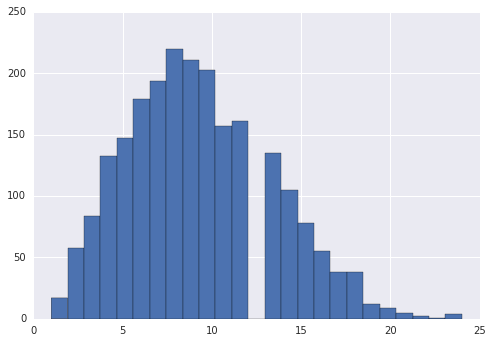

In [36]:
import seaborn
import matplotlib.pyplot as plt

plt.hist(v_topic, bins=25)

(array([  10.,   24.,   38.,   31.,   43.,   53.,  100.,  153.,  100.,
         252.,  328.,  282.,  267.,  211.,  142.,  119.,   26.,   32.,
          14.,    8.,    5.,    4.,    3.,    0.,    1.]),
 array([  1.  ,   2.88,   4.76,   6.64,   8.52,  10.4 ,  12.28,  14.16,
         16.04,  17.92,  19.8 ,  21.68,  23.56,  25.44,  27.32,  29.2 ,
         31.08,  32.96,  34.84,  36.72,  38.6 ,  40.48,  42.36,  44.24,
         46.12,  48.  ]),
 <a list of 25 Patch objects>)

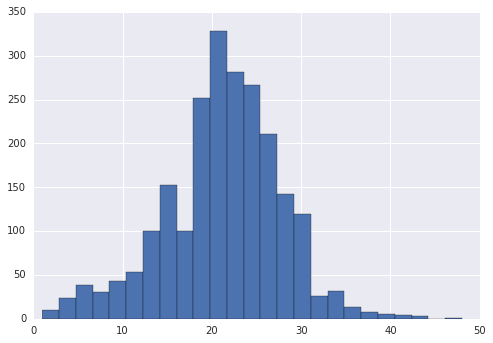

In [40]:
model = models.ldamodel.LdaModel(corpus, num_topics=100, id2word=corpus.id2word, alpha=1)
v_topic = [len(model[doc]) for doc in corpus]
plt.hist(v_topic, bins=25)

(array([  18.,   72.,   92.,  107.,  124.,  196.,  168.,  187.,  187.,
         182.,  186.,  170.,  143.,  114.,   91.,   65.,   54.,   33.,
          21.,   16.,    8.,    4.,    5.,    1.,    2.]),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.]),
 <a list of 25 Patch objects>)

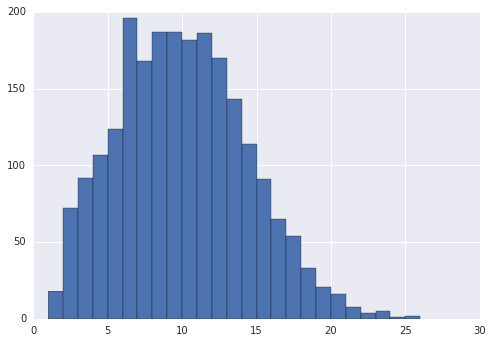

In [45]:
model = models.ldamodel.LdaModel(corpus, num_topics=100, id2word=corpus.id2word, alpha=0.0001)
v_topic = [len(model[doc]) for doc in corpus]
plt.hist(v_topic, bins=25)

In [46]:
for t in range(model.num_topics):
    words = model.show_topic(t, 64)
    tf = sum(w for f, w in words)
    for w, f in words:
        print w, f / tf

poll 0.0593016592253
bushs 0.0551300722407
support 0.0453630958214
bush 0.0451375795192
dukakis 0.0402485387318
new 0.0357297598879
voters 0.031688670665
states 0.0279422692502
president 0.0236528767362
contracts 0.0221769460261
massachusetts 0.0204837418625
percent 0.0203870879678
aziz 0.0202369570089
campaign 0.0193583265068
nonprofit 0.0187700365519
chicago 0.0177587589618
awards 0.0169495863516
democrats 0.0165506497251
i 0.0157631353015
political 0.0143850874503
south 0.0139226693916
economy 0.0138512560459
jackson 0.0137532068387
george 0.0132514705129
democratic 0.0132283224002
york 0.0129770081172
significant 0.0127947463051
million 0.0122325698979
united 0.0116744898474
awarded 0.011517088042
alice 0.0106880092897
apartheid 0.0105814635687
republican 0.0105520377947
amid 0.010369538112
goldman 0.0102933667214
today 0.0101862778223
vice 0.0101844406263
thursday 0.0101825507225
benefited 0.0101378502458
upbeat 0.0100067738583
group 0.00995226065809
release 0.00983931155503
domin